# Titanic

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm





from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
#import xgboost as xgb
#import lightgbm as lgb
#from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

sns.set(style='white', context='notebook', palette='deep')

In [5]:
df = pd.read_csv('input/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().values.any()

True

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#### from table we can notice that the value of count column is the same for every columns from dataset with exception Age
### lets to see Age

In [13]:
df[df['Age'].isnull()].head(40)  ### rows with null age


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [14]:
#### change Syrvided values to boolean
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [25]:
# To bolean

def to_boolean(record):
    """
    """
    if record==1:
        return True
    else :
        return False

    
# to_boolean(0) test  


df['Survived'] = df['Survived'].apply(to_boolean)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null bool
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 77.5+ KB


In [39]:
group  =  df[df['Survived']].groupby('Sex')
for i,j in group:
    #print(i)
    print(type(j))  #return group
group.get_group('male')  
group.get_group('female').count()  

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


PassengerId    233
Survived       233
Pclass         233
Name           233
Sex            233
Age            197
SibSp          233
Parch          233
Ticket         233
Fare           233
Cabin           91
Embarked       231
dtype: int64

<BarContainer object of 577 artists>

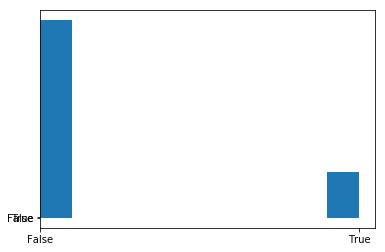

In [73]:
female,male = df.groupby('Sex')
type(male)
type(male[1])

#plt.hist()
a = male[1]['Survived'].astype(str)
type(a)
#plt.hist(a)
a = list(a)
plt.hist(a)
plt.barh(a,width=0)

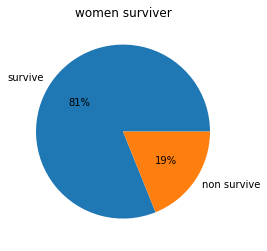

Text(0.5, 1.0, 'man surviver')

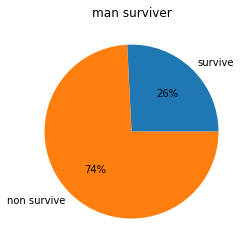

In [108]:
male = df[df['Sex']=='male']
female = df[df['Sex']=='female']
male
#plt.pie(male[male['Survived']]['Survived'])
gr = male.groupby('Survived').size()
#plt.pie(gr.get_group(True).count(),gr.get_group(False))
list(gr.index)
list(gr)
plt.pie(gr,labels=['survive','non survive'],autopct='%1.0f%%')
plt.title('women surviver')
plt.show()
#plt.pie(male[male['Survived']]['Survived'])
gr = female.groupby('Survived').size()
#plt.pie(gr.get_group(True).count(),gr.get_group(False))
list(gr.index)
list(gr)
plt.pie(gr,labels=['survive','non survive'],autopct='%1.0f%%')
plt.title('man surviver')

In [107]:
# The mans was survive more better then women

In [109]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
gr = df.groupby('Pclass')

a = gr.describe()


In [129]:
#mean_age = df[df['Survived']]['Age'].mean()
#a = df[df['Survived']]['Age'].fillna(mean_age)
#df[df['Survived']]['Age'] =a
#df[df['Survived']]['Age'] = list(a) 

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [145]:
a = df[df['Age'].isnull()] 
### fill Nan variable with mean
df['Age']= df['Age'].fillna(mean_age)
print(len(df['Age']))
print(len(df['Age'].fillna(mean_age)))
df['Age'] 

891
891


0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
5      28.34369
6      54.00000
7       2.00000
8      27.00000
9      14.00000
10      4.00000
11     58.00000
12     20.00000
13     39.00000
14     14.00000
15     55.00000
16      2.00000
17     28.34369
18     31.00000
19     28.34369
20     35.00000
21     34.00000
22     15.00000
23     28.00000
24      8.00000
25     38.00000
26     28.34369
27     19.00000
28     28.34369
29     28.34369
         ...   
861    21.00000
862    48.00000
863    28.34369
864    24.00000
865    42.00000
866    27.00000
867    31.00000
868    28.34369
869     4.00000
870    26.00000
871    47.00000
872    33.00000
873    47.00000
874    28.00000
875    15.00000
876    20.00000
877    19.00000
878    28.34369
879    56.00000
880    25.00000
881    33.00000
882    22.00000
883    28.00000
884    25.00000
885    39.00000
886    27.00000
887    19.00000
888    28.34369
889    26.00000
890    32.00000
Name: Age, Length: 891, 

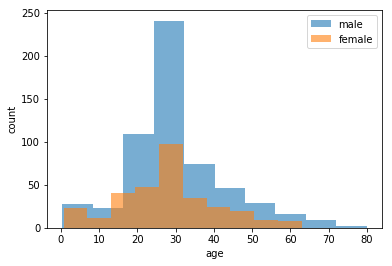

In [163]:
age_male = df[df['Sex']=='male']['Age']
age_female = df[df['Sex']=='female']['Age']
plt.hist(age_male,alpha=0.6,label = 'male')
plt.hist(age_female,alpha=0.6,label = 'female')
plt.xlabel('age')
plt.ylabel('count')
plt.legend()

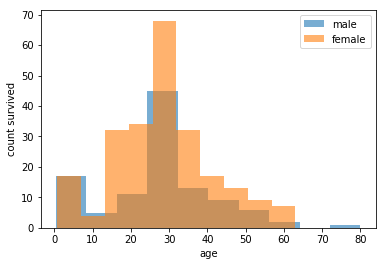

In [161]:
df.head()
age_survide_male = df[(df['Survived']) & (df['Sex']=='male')]['Age']
age_survide_female = df[(df['Survived']) & (df['Sex']=='female')]['Age']
plt.hist(age_survide_male,alpha=0.6,label = 'male')
plt.hist(age_survide_female,alpha=0.6,label = 'female')
plt.xlabel('age')
plt.ylabel('count survived')
plt.legend()

### There is no so big difference in distribution of survived by age between male and female

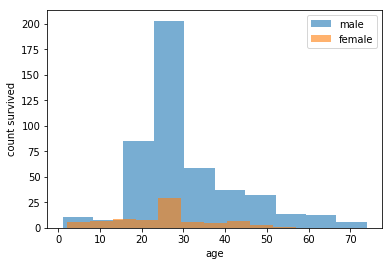

In [162]:
age_survide_male = df[(~df['Survived']) & (df['Sex']=='male')]['Age']
age_survide_female = df[(~df['Survived']) & (df['Sex']=='female')]['Age']
plt.hist(age_survide_male,alpha=0.6,label = 'male')
plt.hist(age_survide_female,alpha=0.6,label = 'female')
plt.xlabel('age')
plt.ylabel('count survived')
plt.legend()

In [164]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [167]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S
5,6,False,3,"Moran, Mr. James",male,28.34369,0,0,330877,8.4583,NaN,Q
6,7,False,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S
7,8,False,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,NaN,S
8,9,True,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,NaN,S
9,10,True,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,NaN,C


In [169]:
#### some mashine leaning

#### Initial Exploration¶

In [180]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")
combine = pd.concat([train.drop('Survived',1),test])

Look at your data in as many different ways as possible. Some properties and connections will be immediately obvious. Others will require you to examine the data, or parts of it, in more specific ways. Metaphorically speaking: this is the part where the detective finds the clues.

First a broad overview. What are the types of data and their typical shape and content?

In [181]:
train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


Together with the PassengerId which is just a running index and the indication whether this passenger survived (1) or not (0) we have the following information for each person:

Pclass is the Ticket-class: first (1), second (2), and third (3) class tickets were used. This is an ordinal integer feature.

Name is the name of the passenger. The names also contain titles and some persons might share the same surname; indicating family relations. We know that some titles can indicate a certain age group. For instance Master is a boy while Mr is a man. This feature is a character string of variable length but similar format.

Sex is an indicator whether the passenger was female or male. This is a categorical text string feature.

Age is the integer age of the passenger. There are NaN values in this column.

SibSp is another ordinal integer feature describing the number of siblings or spouses travelling with each passenger.

Parch is another ordinal integer features that gives the number of parents or children travelling with each passenger.

Ticket is a character string of variable length that gives the ticket number.

Fare is a float feature showing how much each passenger paid for their rather memorable journey.

Cabin gives the cabin number of each passenger. There are NaN in this column. This is another string feature.

Embarked shows the port of embarkation as a categorical character value.

In summary we have 1 floating point feature (Fare), 1 integer variable (Age), 3 ordinal integer features (Plcass, SibSp, Parch), 2 categorical text features (Sex, Embarked), and 3 text string features (Ticket, Cabin, Name).

referecence : ###### https://www.kaggle.com/headsortails/pytanic

In [183]:
z

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Missing values

In [187]:
print(train.isnull().sum())  #### return missing values
print(test.info())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


Knowing about missing values is important because they indicate how much we don't know about our data. Making inferences based on just a few cases is often unwise. In addition, many modelling procedures break down when missing values are involved and the corresponding rows will either have to be removed completely or the values need to be estimated somehow.

We learn:

In the training data a large majority of Cabin numbers are missing, together with 177 Age values and 2 Embarked values.

Also, in the test data there is one Fare missing (cheeky selection), almost 100 Age values are unknown, and only 91 Cabin numbers were preserved. Best to keep that in mind.

In [189]:
surv = train[train['Survived']==1]
nosurv = train[train['Survived']==0]
surv_col = "blue"
nosurv_col = "red"

print("Survived: %i (%.1f percent), Not Survived: %i (%.1f percent), Total: %i"\
      %(len(surv), 1.*len(surv)/len(train)*100.0,\
        len(nosurv), 1.*len(nosurv)/len(train)*100.0, len(train)))

Survived: 342 (38.4 percent), Not Survived: 549 (61.6 percent), Total: 891


in our training data set about 60% of the passengers didn't survive. By flat out predicting that everyone in the testing data set died we would get a 60% accuracy. Let's try to do better than that.

Here we also define a consistent colour scheme for the distinguishing between survived / not survived. This scheme will (soon) be used throughout this kernel.

OK, let's go through the features one by one to see what we find. Here we will see how the distributions of survivors and non-survivors compare. Personally, I like histograms for a first look at comparing two or more populations in case of scaled features. For categorical features we will use barplots plus standard deviation bars, to better judge the significance.

342
290


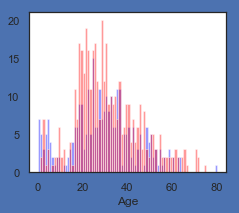

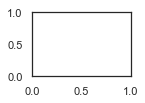

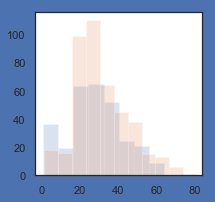

Median age survivors: 28.0, Median age non-survivers: 28.0


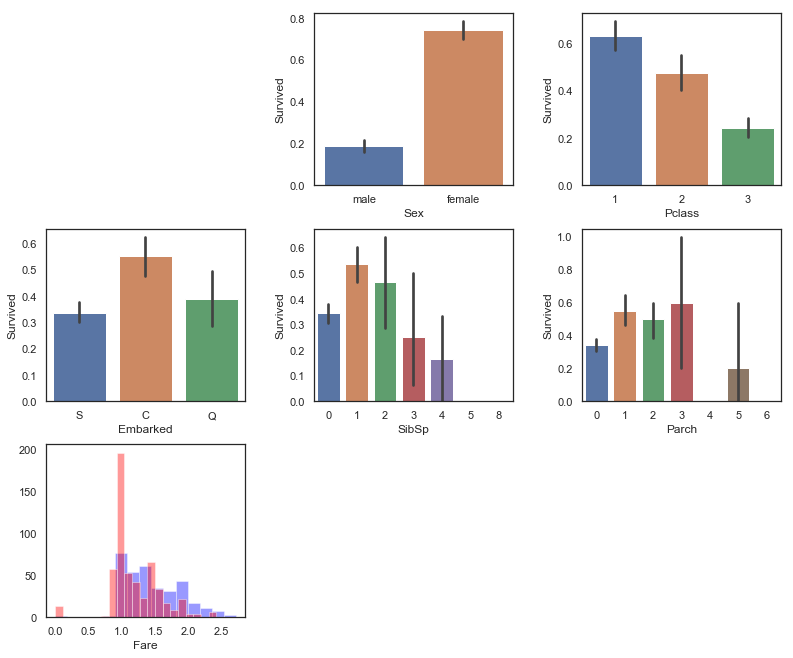

In [225]:
plt.figure(figsize=[12,10],facecolor='b',edgecolor='g')  ### figsize the size for fig
plt.subplot(331)
#plt.scatter(1,1)
s = surv['Age']
print(len(s))
s = surv['Age'].dropna().values
print(len(s))
# https://seaborn.pydata.org/generated/seaborn.distplot.html
sns.distplot(surv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_col)
sns.distplot(nosurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_col,
           axlabel='Age')
plt.show()
plt.subplot(332)
plt.figure(figsize=[3,3],facecolor='b',edgecolor='g')
plt.hist(surv['Age'].dropna().values,alpha=0.2)
plt.hist(nosurv['Age'].dropna().values,alpha=0.2)
plt.show()
# https://seaborn.pydata.org/generated/seaborn.barplot.html
plt.figure(figsize=[12,10]) 
plt.subplot(332)
sns.barplot('Sex', 'Survived', data=train)
plt.subplot(333)
sns.barplot('Pclass', 'Survived', data=train)
plt.subplot(334)
sns.barplot('Embarked', 'Survived', data=train)
plt.subplot(335)
sns.barplot('SibSp', 'Survived', data=train)
plt.subplot(336)
sns.barplot('Parch', 'Survived', data=train)
plt.subplot(337)
sns.distplot(np.log10(surv['Fare'].dropna().values+1), kde=False, color=surv_col)
sns.distplot(np.log10(nosurv['Fare'].dropna().values+1), kde=False, color=nosurv_col,axlabel='Fare')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

print("Median age survivors: %.1f, Median age non-survivers: %.1f"\
      %(np.median(surv['Age'].dropna()), np.median(nosurv['Age'].dropna())))


Above we are creating a kind of summary dashboard, where we collect relevant visualisations to study the distributions of the individual features. We use the matplotlib subplot tool to line up the individual plots in a grid. We use overlapping histograms for ordinal features and barplots for categorical features. The barplots show the fraction of people (per group) who survived. There's a lot going on in this figure, so take your time to look at all the details.

We learn the following things from studying the individual features:

Age: The medians are identical. However, it's noticeable that fewer young adults have survived (ages 18 - 30-ish) whereas children younger than 10-ish had a better survival rate. Also, there are no obvious outliers that would indicate problematic input data. The highest ages are well consistent with the overall distribution. There is a notable shortage of teenagers compared to the crowd of younger kids. But this could have natural reasons.

Pclass: There's a clear trend that being a 1st class passenger gives you better chances of survival. Life just isn't fair.

SibSp & Parch: Having 1-3 siblings/spouses/parents/children on board (SibSp = 1-2, Parch = 1-3) suggests proportionally better survival numbers than being alone (SibSp + Parch = 0) or having a large family travelling with you.

Embarked: Well, that does look more interesting than expected. Embarking at "C" resulted in a higher survival rate than embarking at "S". There might be a correlation with other variables, here though.

Fare: This is case where a linear scaling isn't of much help because there is a smaller number of more extreme numbers. A natural choice in this case is to transform the values logarithmically. For this to work we need to adjust for the zero-fare entries. The plot tells us that the survival chances were much lower for the cheaper cabins. Naively, one would assume that those cheap cabins were mostly located deeper inside the ship, i.e. further away from the life boats.

A little follow up: For SibSp we see in the plot that most of the differences are not very significant (overlapping error bars). Another way of checking the actual numbers are through cross tables:

In [226]:
tab = pd.crosstab(train['SibSp'], train['Survived'])
print(tab)

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


Passengers with more than 3 children+parents on board had low survival chances. However the corresponding number are not very large. For SibSp we have 15 vs 3, 5 vs 0, and 7 vs 0.

Random outcomes with 2 possibilities (like heads or tails when flipping a coin) follow the binomial distribution. We can use a binomial test to estimate the probability that 5 non-survivors out of a total 5 passengers with SibSp = 5 happened due to chance assuming the overall 38% survival chance for the entire sample.

In [229]:
stats.binom_test(x=5,n=5,p=0.62)
# https://stat.ethz.ch/R-manual/R-patched/library/stats/html/binom.test.html

0.16417601599999998

Anything above 0.05 is usually not significant and therefore solely based on these numbers we cannot say whether the SibSp = 5 sample behaves different than the rest.

For larger numbers of Parch we have 4 vs 0, 4 vs 1, and 1 vs 0. Just by themselves, the last two are definitely not impressive. Combining them into parch >= 4 gives us 9 vs 1 which is much better.

We learn: parch >= 4 and sibsp >= 3 is bad. So is parch + sibsp = 0 (i.e. both 0). Parch in 1-3 and Sibsp in 1-2 is good.

Cabin numbers
This is a tricky feature because there are so many missing values and the strings don't all have the same number or formatting.

### Ticket numbers
That seems to be a hopeless variable at first because it just looks like random strings. But in these days, when you were travelling as a group/family did everyone really get their own ticket? Let's find out how many unique ticket numbers there are:

In [230]:
print("There are %i unique ticket numbers among the %i tickets." \
      %(train['Ticket'].nunique(),train['Ticket'].count()))

There are 681 unique ticket numbers among the 891 tickets.


In [231]:
grouped = train.groupby('Ticket')
k = 0
for name, group in grouped:
    if (len(grouped.get_group(name)) > 1):
        print(group.loc[:,['Survived','Name', 'Fare']])
        k += 1
    if (k>10):
        break

     Survived                                               Name  Fare
257         1                               Cherry, Miss. Gladys  86.5
504         1                              Maioni, Miss. Roberta  86.5
759         1  Rothes, the Countess. of (Lucy Noel Martha Dye...  86.5
     Survived                                    Name   Fare
262         0                       Taussig, Mr. Emil  79.65
558         1  Taussig, Mrs. Emil (Tillie Mandelbaum)  79.65
585         1                     Taussig, Miss. Ruth  79.65
     Survived                            Name  Fare
110         0  Porter, Mr. Walter Chamberlain  52.0
475         0     Clifford, Mr. George Quincy  52.0
     Survived                                             Name     Fare
329         1                     Hippach, Miss. Jean Gertrude  57.9792
523         1  Hippach, Mrs. Louis Albert (Ida Sophia Fischer)  57.9792
     Survived                                    Name  Fare
166         1  Chibnall, Mrs. (Edith Mar

We can try out:

Working hypothesis: if your group (mostly family) survived then you survived as well, unless you were a man (and presumably helped your wife/daughter/lady friend). We could go through the trouble here to identify families by last name. However

Common last names might not be unique in the passenger list
As we see above a ticket is not always shared by people with a common name.
Therefore, a shared ticket might actually be a stronger predictor. Of course this assumption should be tested by doing the last-name thing too. In addition, we see that the Fare was identical for all the passengers in each ticket group. This is something we will explore in more detail below.



### Relations between features

After inspecting the available features individually you might have realised that some of them are likely to be connected. Does the age-dependent survival change with sex? How are pclass and fare related? Are they strongly enough connected so that one of them is superfluous? Let's find out.
Does the age-dependent survival change with sex? How are pclass and fare related? Are they strongly enough connected so that one of them is superfluous? Let's find out.

Now we are connecting individual clues to get a glimpse of the bigger picture.

We start with an overview plot of the feature relations: Here we show a correlation matrix for each numerical variable with all the other numerical variables. We excluded PassengerID, which is merely a row index. In the plot, stronger correlations have brighter colours in either red (positive correlation) or blue (negative correlation). The closer to white a colour is the weaker the correlation.



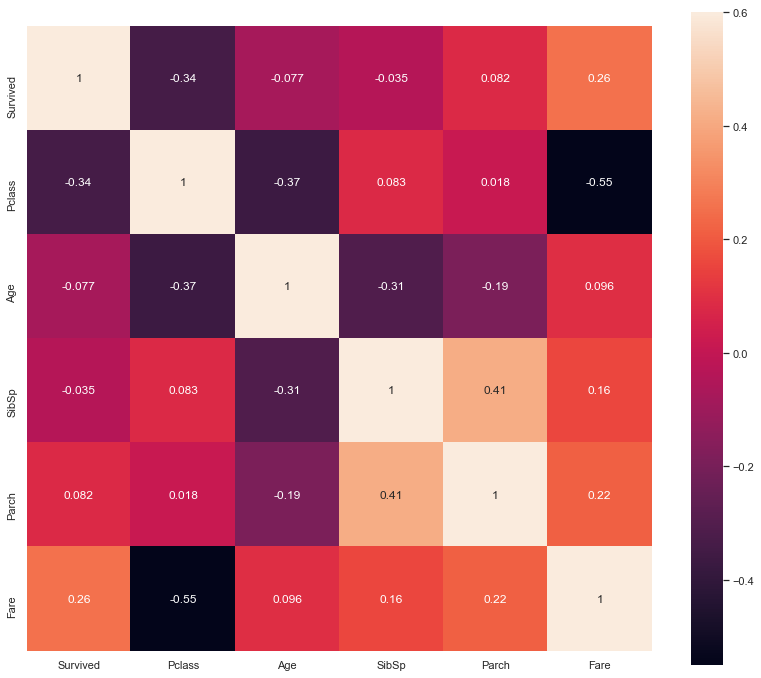

In [233]:
plt.figure(figsize=(14,12))
foo = sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

Positive vs negative correlation needs to be understood in terms of whether an increase in one feature leads to an increase (positive) or decrease (negative) in the correlated feature. Perfect correlation would have a correlation index of 1; perfect anti-correlation (= negative correlation) would have -1 (obviously each feature is perfectly correlated with itself; leading to the deep red diagonal). The upper right vs lower left triangle that make up this plot contain the same information, since the corresponding cells show the correlation coefficients of the same features.

The matrix gives us an overview as to which features are particularly interesting for our analysis. Both strongly positive or negative correlations with the Survived feature are valuable. Strong correlations between two other features would suggest that only one of them is necessary for our model (and including the other would in fact induce noise and potentially lead to over-fitting).

We learn:

Pclass is somewhat correlated with Fare (1st class tickets would be more expensive than 3rd class ones)
SibSp and Parch are weakly correlated (large families would have high values for both; solo travellers would have zero for both)
Pclass already correlates with Survived in a noticeable way

Now we continue to examine these initial indications in more detail. Earlier, we had a look at the Survived statistics of the individual features in the overview figure. Here, we want to look at correlations between the predictor features and how they could affect the target Survived behaviour.

Usually it's most interesting to start with the strong signals in the correlation plot and to examine them more in detail.

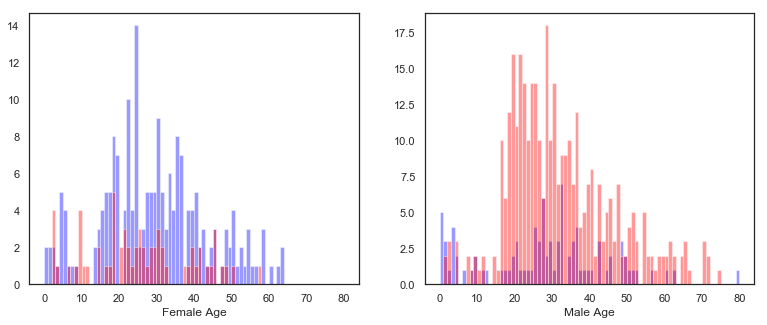

In [235]:
msurv = train[(train['Survived']==1) & (train['Sex']=="male")]
fsurv = train[(train['Survived']==1) & (train['Sex']=="female")]
mnosurv = train[(train['Survived']==0) & (train['Sex']=="male")]
fnosurv = train[(train['Survived']==0) & (train['Sex']=="female")]

plt.figure(figsize=[13,5])
plt.subplot(121)
sns.distplot(fsurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_col)
sns.distplot(fnosurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_col,
            axlabel='Female Age')

plt.subplot(122)
sns.distplot(msurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_col)
sns.distplot(mnosurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_col,
            axlabel='Male Age')

We learn:

For females the survival chances appear to be higher between 18 and 40, whereas for men in that age range the odds are flipped. This difference between 18-40 yr olds might be a better feature than Sex and Age by themselves.

Boys have proportional better survival chances than men, whereas girls have similar chances as women have. Rather small numbers, though.

We study the correlation of Age with Pclass using a violin plot, which is also split between survived (right half) and not survived (left half). Check out the other visualisations in your forked copy.

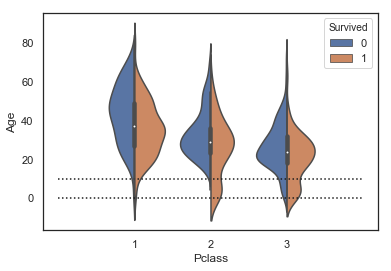

In [237]:
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True)
plt.hlines([0,10], xmin=-1, xmax=3, linestyles="dotted")

olin plots are a modified version of boxplots, where the shape is a "kernel density estimate" of the underlying distribution. These estimates are smoothed and therefore extend beyond the actual values (look closely at the dotted zero level). I have also indicated Age == 10, which we will use to define children (vs teenagers) in the engineering part below.

We learn:

Age decreases progressively as Pclass decreases from 1st to 3rd
Most older passengers are 1st class, but very few children are. This conflates the impact of Age and Pclass on the survival chances.
In 1st class, younger adults had better survival chances than older ones.
Most children in 2nd class survived, and the majority in 3rd class did too.
For a view into Pclass vs Sex let's use a mosaic plot for a 2-dimensional overview.

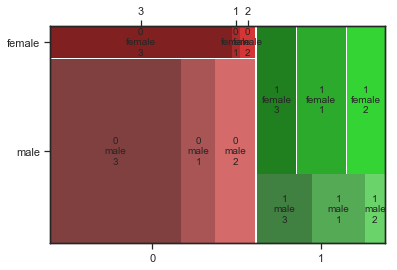

In [239]:
dummy = mosaic(train,["Survived","Sex","Pclass"])

Sex       female  male
Embarked              
C            113   157
Q             60    63
S            291   623


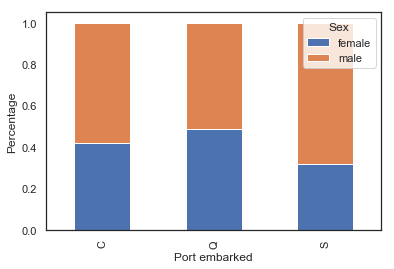

In [240]:
tab = pd.crosstab(combine['Embarked'], combine['Sex'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Port embarked')
dummy = plt.ylabel('Percentage')

Sex     female  male
Pclass              
1          144   179
2          106   171
3          216   493


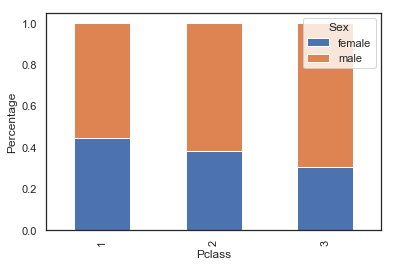

In [241]:
tab = pd.crosstab(combine['Pclass'], combine['Sex'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Pclass')
dummy = plt.ylabel('Percentage')

... there were more males among the 3rd class passengers. Possibly travelling alone?

Sex    female  male
SibSp              
0         174   434
1         106   103
2          13    15
3          11     5
4           6    12
5           1     4
8           3     4
Sex    female  male
Parch              
0         194   484
1          60    58
2          49    31
3           4     1
4           2     2
5           4     1
6           1     0


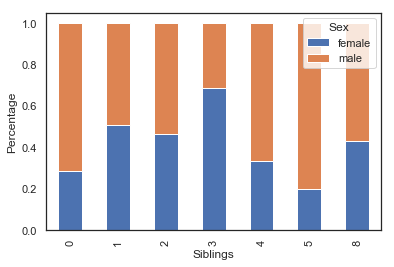

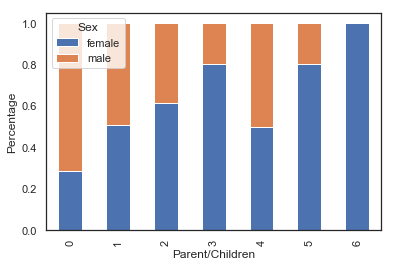

In [243]:
sib = pd.crosstab(train['SibSp'], train['Sex'])
print(sib)
dummy = sib.div(sib.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Siblings')
dummy = plt.ylabel('Percentage')

parch = pd.crosstab(train['Parch'], train['Sex'])
print(parch)
dummy = parch.div(parch.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Parent/Children')
dummy = plt.ylabel('Percentage')

### Filling in missing values
After studying the relations between the different features let's fill in a few missing values based on what we learned.

In my opinion, the only training feature for which it makes sense to fill in the NAs is Embarked. Too many Cabin numbers are missing. And for Age we will choose a different approach below. We fill in the 1 missing Fare value in the test data frame accordingly.

Let's find the two passengers and assign the most likely port based on what we found so far:

### A Statistical Analysis & ML workflow of Titanic

###### https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic

#### Overview and cleaning data

In [245]:
## saving passenger id in advance in order to submit later. 
passengerid = test.PassengerId
## We will drop PassengerID and Ticket since it will be useless for our data. 
#train.drop(['PassengerId'], axis=1, inplace=True)
#test.drop(['PassengerId'], axis=1, inplace=True)

print (train.info())
print ("*"*40)
print (test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non

It looks like, the features have unequal amount of data entries for every column and they have many different types of variables. This can happen for the following reasons...

We may have missing values in our features.
We may have categorical features.
We may have alphanumerical or/and text features.

Dealing with missing data

Missing values in train dataset.

In [249]:
# Let's write a functin to print the total percentage of the missing values.(this can be a good exercise for beginners to try to write simple functions like this.)
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent']) ##concat by adding column
missing_percentage(train)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [250]:
missing_percentage(test)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


We see that in both train, and test dataset have missing values. Let's make an effort to fill these missing values starting with "Embarked" feature.

In [251]:
def percent_value_counts(df, feature):
    """This function takes in a dataframe and a column and finds the percentage of the value_counts"""
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    ## creating a df with th
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    ## concating percent and total dataframe

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

In [252]:
percent_value_counts(train, 'Embarked')

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


It looks like there are only two null values( ~ 0.22 %) in the Embarked feature, we can replace these with the mode value "S". However, let's dig a little deeper.

Let's see what are those two null values

In [253]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


We may be able to solve these two missing values by looking at other independent variables of the two raws. Both passengers paid a fare of $80, are of Pclass 1 and female Sex. Let's see how the Fare is distributed among all Pclass and Embarked feature values

D:\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


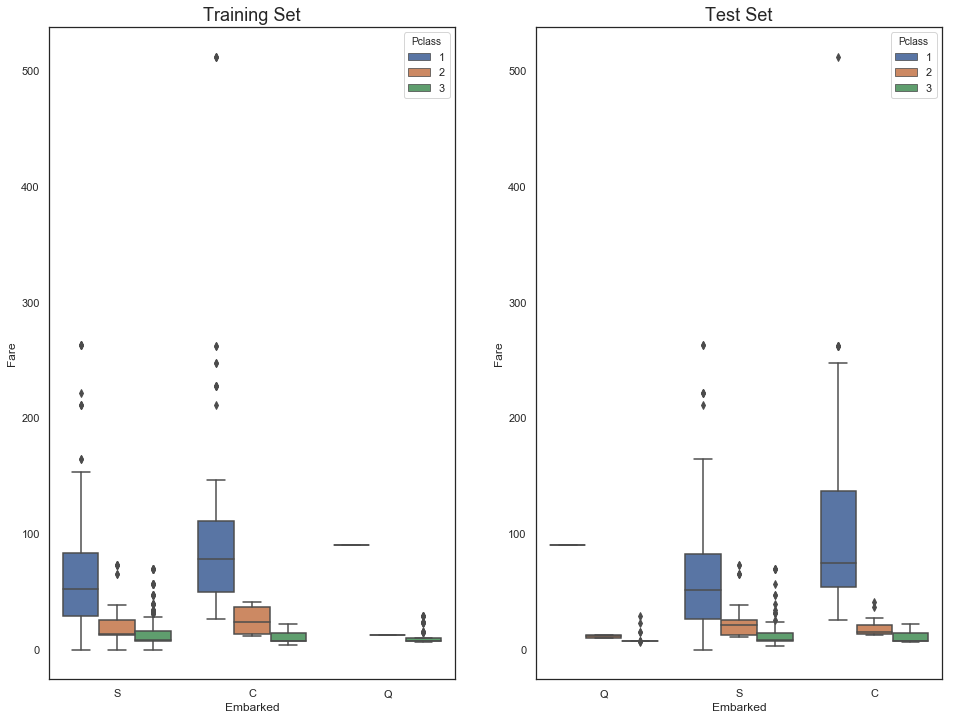

In [254]:
### https://en.wikipedia.org/wiki/Box_plot

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)
fig.show()

Here, in both training set and test set, the average fare closest to $80 are in the C Embarked values. So, let's fill in the missing values as "C"

In [256]:
train.Embarked.fillna("C", inplace=True) ### replace nan with C
print("Train Cabin missing: " + str(train.Cabin.isnull().sum()/len(train.Cabin)))
print("Test Cabin missing: " + str(test.Cabin.isnull().sum()/len(test.Cabin)))

Train Cabin missing: 0.7710437710437711
Test Cabin missing: 0.7822966507177034


Approximately 77% of Cabin feature is missing in the training data and 78% missing on the test data. We have two choices,

we can either get rid of the whole feature, or
we can brainstorm a little and find an appropriate way to put them in use. For example, We may say passengers with cabin record had a higher socio-economic-status then others. We may also say passengers with cabin record were more likely to be taken into consideration when loading into the boat.
Let's combine train and test data first and for now, will assign all the null values as "N"

All the cabin names start with an English alphabet following by multiple digits. It seems like there are some passengers that had booked multiple cabin rooms in their name. This is because many of them travelled with family. However, they all seem to book under the same letter followed by different numbers. It seems like there is a significance with the letters rather than the numbers. Therefore, we can group these cabins according to the letter of the cabin name.

In [259]:
## Concat train and test into a variable "all_data"
survivers = train.Survived

train.drop(["Survived"],axis=1, inplace=True)

all_data = pd.concat([train,test], ignore_index=False)

## Assign all the null values to N
all_data.Cabin.fillna("N", inplace=True)

In [260]:
all_data.Cabin = [i[0] for i in all_data.Cabin]

In [262]:
percent_value_counts(all_data, "Cabin")


Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

So, We still haven't done any effective work to replace the null values. Let's stop for a second here and think through how we can take advantage of some of the other features here.

We can use the average of the fare column We can use pythons groupby function to get the mean fare of each cabin letter.

In [263]:
all_data.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [264]:
with_N = all_data[all_data.Cabin == "N"]

without_N = all_data[all_data.Cabin != "N"]

all_data.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [265]:
def cabin_estimator(i):
    """Grouping cabin feature by the first letter"""
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a

Let's apply cabin_estimator function in each unknown cabins(cabin with null values). Once that is done we will separate our train and test to continue towards machine learning modeling.

In [266]:
##applying cabin estimator function. 
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1]:
## getting back train. 
all_data = pd.concat([with_N, without_N], axis=0)

## PassengerId helps us separate train and test. 
all_data.sort_values(by = 'PassengerId', inplace=True)

## Separating train and test from all_data. 
train = all_data[:891]

test = all_data[891:]

# adding saved target variable with train. 
train['Survived'] = survivers

## Separating train and test from all_data. 
train = all_data[:891]

test = all_data[891:]

# adding saved target variable with train. 
train['Survived'] = survivers

NameError: name 'pd' is not defined

In [268]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


In [269]:
missing_value = test[(test.Pclass == 3) & (test.Embarked == "S") & (test.Sex == "male")].Fare.mean()
## replace the test.fare null values with test.fare mean
test.Fare.fillna(missing_value, inplace=True)

D:\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### Age Feature

In [271]:
print ("Train age missing value: " + str((train.Age.isnull().sum()/len(train))*100)+str("%"))
print ("Test age missing value: " + str((test.Age.isnull().sum()/len(test))*100)+str("%"))

Train age missing value: 19.865319865319865%
Test age missing value: 20.574162679425836%


### Visualization and Feature Relations





Before we dive into finding relations between different features and our dependent variable(survivor) let us create some predictions about how the relations may turnout among features.

Predictions:

Gender: More female survived than male
Pclass: Higher socio-economic status passenger survived more than others.
Age: Younger passenger survived more than other passengers.
Now, let's see how the features are related to each other by creating some visualizations.

0.18890814558058924
0.4038128249566724


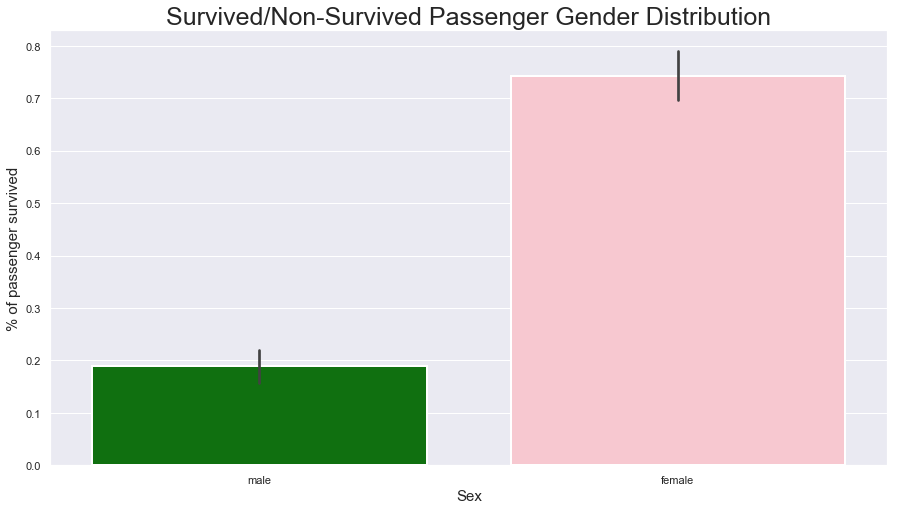

In [291]:
pal = {'male':"green", 'female':"Pink"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
####  x = 'column wich will be grouped into two or more barplot'
#### y = column wich will be somehow distributed or visilase count
### in somehow using percenge
ax = sns.barplot(x = "Sex",y = "Survived",data=train,palette = pal,linewidth=2 )

plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25)
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Sex",fontsize = 15);






male_pe = len(train[(train['Sex']=='male') & (train['Survived']==1)])/len(train[(train['Sex']=='male')])  #percent of survived mans


female_pe = len(train[(train['Sex']=='female') & (train['Survived']==1)])/len(train[(train['Sex']=='male')])
print(male_pe)
print(female_pe)

This count plot shows the actual distribution of male and female passengers that survived and did not survive. It shows that among all the females ~ 230 survived and ~ 70 did not survive. While among male passengers ~110 survived and ~480 did not survive.

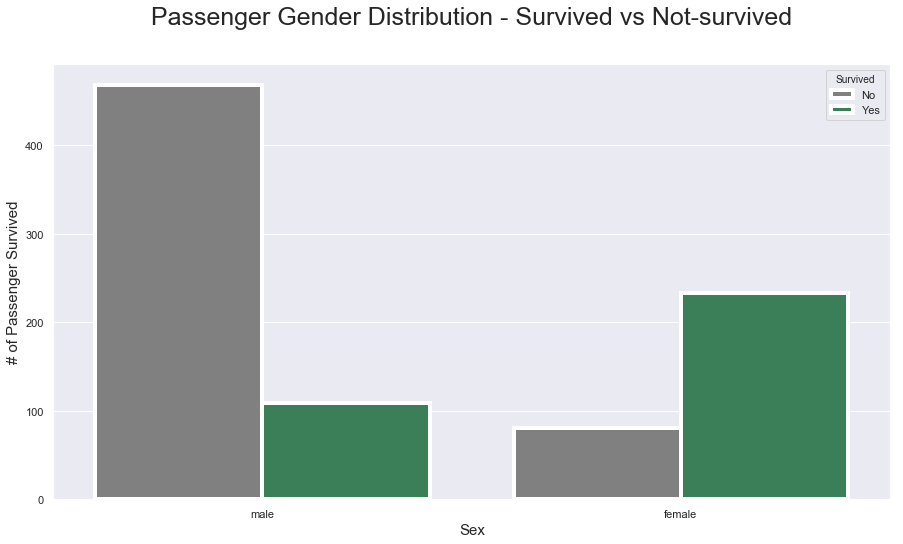

In [299]:
### count plot

pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))

# count plot grouped by sex ,shows count with condition survived
ax = sns.countplot(x = "Sex",  hue="Survived", data = train,  linewidth=4, palette = pal)
## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25, pad=40)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

#  Pclass and Survived

### box plot class

pal = {1:"green", 2:"red",3:"blue"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Pclass",y = "Survived",data=train,palette = pal,linewidth=2 )

plt.title("Survived/Non-Survived Passenger Class distribution", fontsize = 25)
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Class",fontsize = 15);



This count plot shows the actual distribution of male and female passengers that survived and did not survive. It shows that among all the females ~ 230 survived and ~ 70 did not survive. While among male passengers ~110 survived and ~480 did not survive.
### Sumary
$$As we suspected, female passengers have survived at a much better rate than male passengers.<br>
It seems about right since females and children were the priority.

In [78]:
pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.077221
SibSp,0.035322
PassengerId,0.005007


Sex is the most important correlated feature with Survived(dependent variable) feature followed by Pclass.

In [81]:
## get the most important variables. 
corr = train.corr()**2
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Pclass         0.114569
Fare           0.066207
Parch          0.006663
Age            0.005963
SibSp          0.001248
PassengerId    0.000025
Name: Survived, dtype: float64

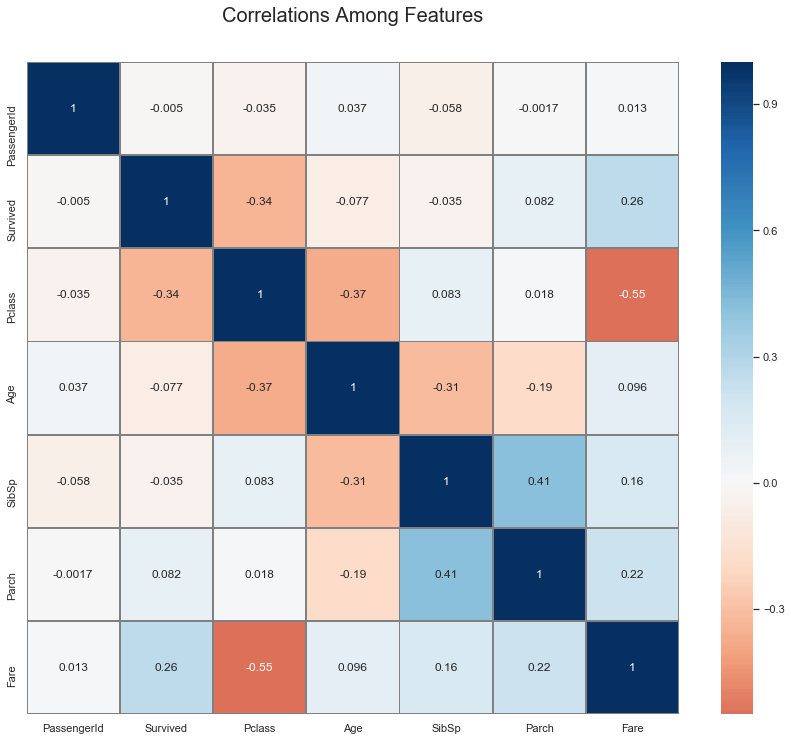

In [82]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
import numpy as np
mask = np.zeros_like(train.corr(), dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='gray',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

Positive Correlation Features:
Fare and Survived: 0.26
Negative Correlation Features:
Fare and Pclass: -0.6
Sex and Survived: -0.55
Pclass and Survived: -0.33
So, Let's analyze these correlations a bit. We have found some moderately strong relationships between different features. There is a definite positive correlation between Fare and Survived rated. This relationship reveals that the passenger who paid more money for their ticket were more likely to survive. This theory aligns with one other correlation which is the correlation between Fare and Pclass(-0.6). This relationship can be explained by saying that first class passenger(1) paid more for fare then second class passenger(2), similarly second class passenger paid more than the third class passenger(3). This theory can also be supported by mentioning another Pclass correlation with our dependent variable, Survived. The correlation between Pclass and Survived is -0.33. This can also be explained by saying that first class passenger had a better chance of surviving than the second or the third and so on.

However, the most significant correlation with our dependent variable is the Sex variable, which is the info on whether the passenger was male or female. This negative correlation with a magnitude of -0.54 which points towards some undeniable insights. Let's do some statistics to see how statistically significant this correlation is.

### Statistical Test for Correlatio

4b. Statistical Test for Correlation

Statistical tests are the scientific way to prove the validation of theories. In any case, when we look at the data, we seem to have an intuitive understanding of where data is leading us. However, when we do statistical tests, we get a scientific or mathematical perspective of how significant these results are. Let's apply some of these methods and see how we are doing with our predictions.

Hypothesis Testing Outline
A hypothesis test compares the mean of a control group and experimental group and tries to find out whether the two sample means are different from each other and if they are different, how significant that difference is.

A hypothesis test usually consists of multiple parts:

Formulate a well-developed research problem or question: The hypothesis test usually starts with a concrete and well-developed researched problem. We need to ask the right question that can be answered using statistical analyses.
The null hypothesis( H0 ) and Alternating hypothesis( H1 ):

The null hypothesis( H0 ) is something that is assumed to be true. It is the status quo. In a null hypothesis, the observations are the result of pure chance. When we set out to experiment, we form the null hypothesis by saying that there is no difference between the means of the control group and the experimental group.
An Alternative hypothesis( HA ) is a claim and the opposite of the null hypothesis. It is going against the status quo. In an alternative theory, the observations show a real effect combined with a component of chance variation.
Determine the test statistic: test statistic can be used to assess the truth of the null hypothesis. Depending on the standard deviation we either use t-statistics or z-statistics. In addition to that, we want to identify whether the test is a one-tailed test or two-tailed test. This article explains it pretty well. This article is pretty good as well.

Specify a Significance level: The significance level( α ) is the probability of rejecting a null hypothesis when it is true. In other words, we are comfortable/confident with rejecting the null hypothesis a significant amount of times even though it is true. This considerable amount is our Significant level. In addition to that significance level is one minus our Confidence interval. For example, if we say, our significance level is 5%, then our confidence interval would be (1 - 0.05) = 0.95 or 95%.

Compute the T-statistics: Computing the t-statistics follows a simple equation. This equation slightly differs depending on one sample test or two sample test

Compute the P-value: P-value is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis is correct. The p-value is known to be unintuitive, and even many professors are known to explain it wrong. I think this video explains the p-value well. The smaller the P-value, the stronger the evidence against the null hypothesis.

Describe the result and compare the p-value with the significance value( α ): If p<= α , then the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid. However if the p>  α , we say that, we fail to reject the null hypothesis. Even though this sentence is grammatically wrong, it is logically right. We never accept the null hypothesis just because we are doing the statistical test with sample data points.

We will follow each of these steps above to do your hypothesis testing below.

Hypothesis testing for Titanic
Formulating a well developed researched question:
Regarding this dataset, we can formulate the null hypothesis and alternative hypothesis by asking the following questions.

Is there a significant difference in the mean sex between the passenger who survived and passenger who did not survive?.
Is there a substantial difference in the survival rate between the male and female passengers?
The Null Hypothesis and The Alternative Hypothesis:
We can formulate our hypothesis by asking questions differently. However, it is essential to understand what our end goal is. Here our dependent variable or target variable is Survived. Therefore, we say

Null Hypothesis( H0 ): There is no difference in the survival rate between the male and female passengers. or the mean difference between male and female passenger in the survival rate is zero.
Alternative Hypothesis( HA ): There is a difference in the survival rate between the male and female passengers. or the mean difference in the survival rate between male and female is not zero.

Onc thing we can do is try to set up the Null and Alternative Hypothesis in such way that, when we do our t-test, we can choose to do one tailed test. According to this article, one-tailed tests are more powerful than two-tailed test. In addition to that, this video is also quite helpful understanding these topics. with this in mind we can update/modify our null and alternative hypothesis. Let's see how we can rewrite this..

Null Hypothesis( H0 ): The

Determine the test statistics:
This will be a two-tailed test since the difference between male and female passenger in the survival rate could be higher or lower than 0. Since we do not know the standard deviation( σ ) and n is small, we will use the t-distribution.

Specify the significance level:
Specifying a significance level is an important step of the hypothesis test. It is an ultimate balance between type 1 error and type 2 error. We will discuss more in-depth about those in another lesson. For now, we have decided to make our significance level( α ) = 0.05. So, our confidence interval or non-rejection region would be (1 -  α ) = 95%.

Computing T-statistics and P-value:
Let's take a random sample and see the difference.

In [86]:
male_mean = train[train['Sex'] == 1].Survived.mean()
male_mean
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic